# With this notebook we will:
## 1. Install packages needed for root
## 2. Download a binary root that compiled in google drive "colaboratory" environement
## 3. Modify the PATH in order to tell python where to look for pyROOT
## 4. Finally, test ROOT installation with a simple example

##### Author: Jose Ruiz
##### Maintainer: Jose Ruiz
##### Developed at: Universidad de Antioquia


### 1. Install packages needed for root

In [0]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxft-dev is already the newest version (2.3.2-1).
libxpm-dev is already the newest version (1:3.5.12-1).
subversion is already the newest version (1.9.7-4ubuntu1).
binutils is already the newest version (2.30-21ubuntu1~18.04.2).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
dpkg-dev is already the newest version (1.19.0.5ubuntu2.3).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.2).
tar is already the newest version (1.29b-2ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


### 2. Mount the drive to get the root binary and untar it 

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Shared drives/PyROOT_in_Google/"

BasicAnalysis.ipynb	  HistogrammingInROOT.ipynb
BasicPyROOTExample.ipynb  monje-a-lo-bonzo-blanco-y-negro.png
Chi2Fitting.ipynb	  piano-C5.wav
Data5.root		  Random2DHistos
FFT_imagen.ipynb	  root_build_google_yikes.tar
FFT.ipynb		  TrimmedTree.root
FLUTEMI.WAV		  TTreeExcercise.ipynb


In [0]:
!tar -xf /content/drive/Shared\ drives/PyROOT_in_Google/root_build_google_yikes.tar

In [0]:
!ls -ltrh

total 12K
drwxr-xr-x 44 root root 4.0K Sep 20  2018 root_build
drwxr-xr-x  1 root root 4.0K Nov  6 16:17 sample_data
drwx------  4 root root 4.0K Nov 11 20:26 drive



### 3. Modify the PATH in order to tell python where to look for pyROOT


In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [2]:
import ROOT

Welcome to JupyROOT 6.14/04


In [0]:
#TH1F("hfix","hfix title",nbins,xlow,xup)
BKG = ROOT.TH1F( 'BKG', 'My background model', 20, 50, 1050 )

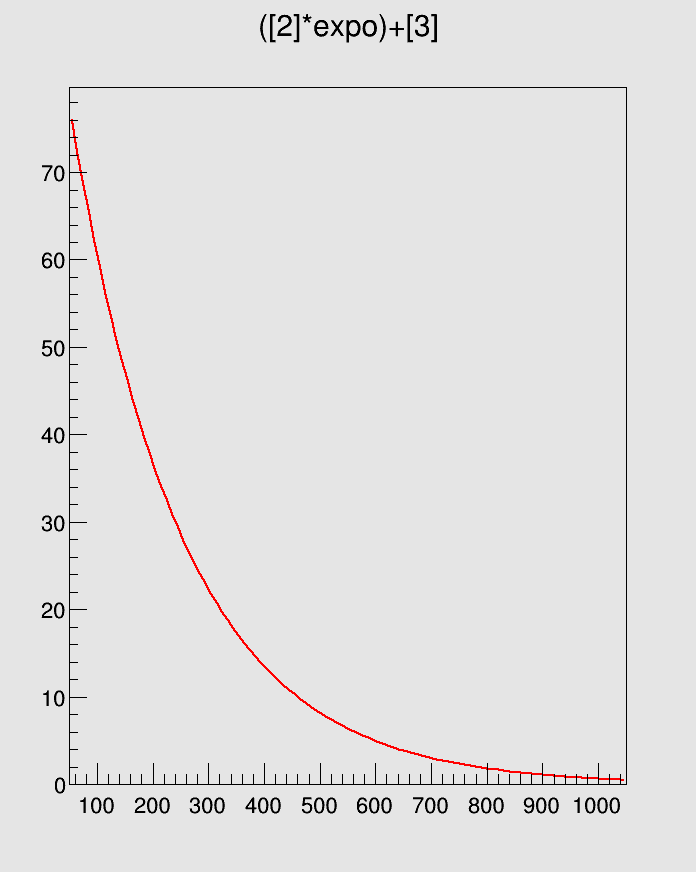

In [4]:
c1 = ROOT.TCanvas( 'c1', 'My First Data example', 200, 10, 700, 900 )
c1.SetFillColor( 18 )

#This creates a function of variable x with 4 parameters. 
expde = ROOT.TF1("expde","([2]*expo)+[3]",50,1050)

#The parameters must be initialized via
expde.SetParameters(0.0,-0.005,100,0.0)

expde.Draw()

c1.Update()
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()

In [0]:
BKG.FillRandom("expde",100000)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


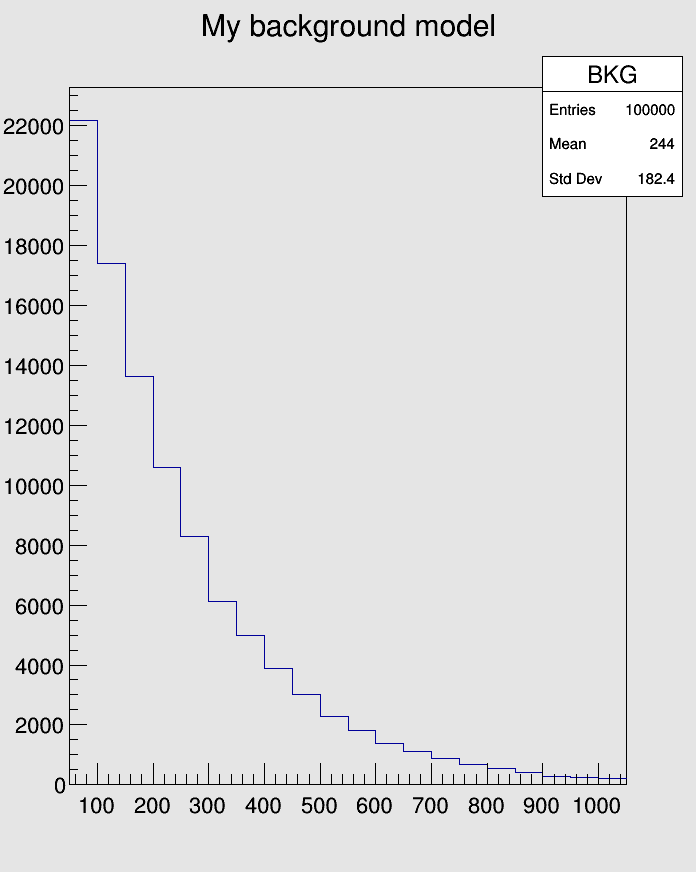

In [6]:
c1 = ROOT.TCanvas( 'c1', 'My First Data example', 200, 10, 700, 900 )
c1.SetFillColor( 18 )
BKG.Draw()
c1.Update()
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()

In [0]:
SignalModel = ROOT.TH1F( 'sig', 'My signal model', 20, 50, 1050 )

In [0]:
signal = ROOT.TF1("signal", "gaus", 50, 1050)
signal.SetParameters(1.0,500.0,50.0)

In [0]:
SignalModel.FillRandom("signal",10000)

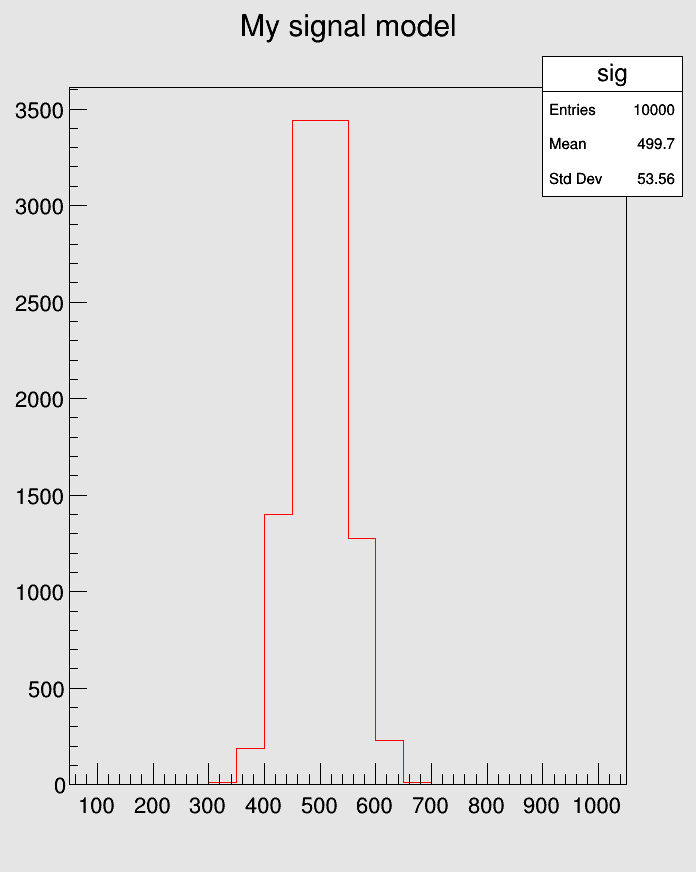

In [10]:
SignalModel.Draw()
SignalModel.SetLineColor(2)
c1.Update()
gROOT.GetListOfCanvases().Draw()

In [0]:
BkgSig = BKG.Clone("bkgpsig")

In [12]:
BkgSig.Sumw2()

'''
Add	(	TF1 * 	f1,
Double_t 	c1 = 1,
Option_t * 	option = "" 
)

Performs the operation: this = this + c1*f1 if errors are defined (see TH1::Sumw2), errors are also recalculated.

'''	


BkgSig.Add(SignalModel,10)

True

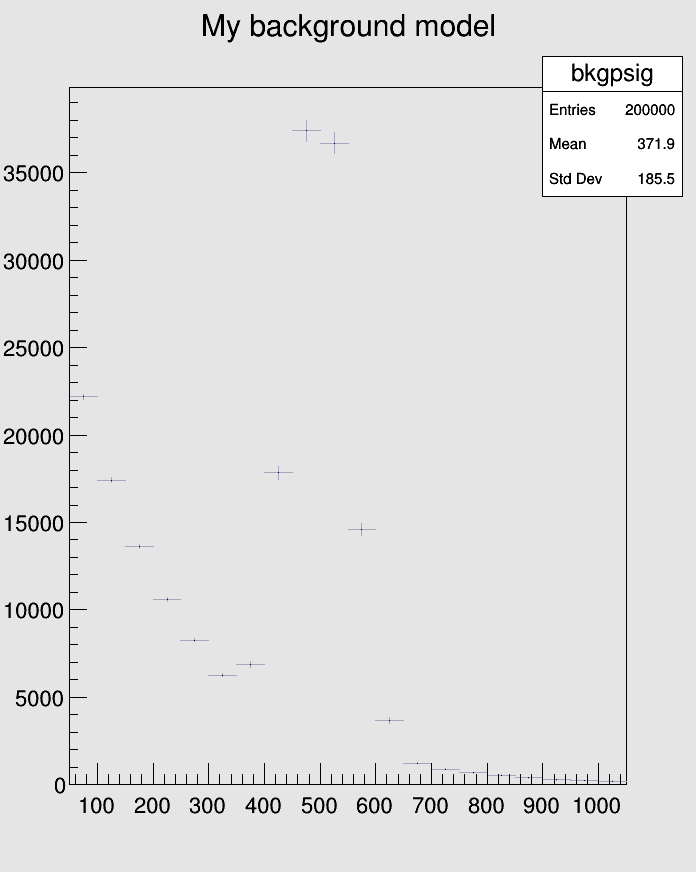

In [14]:
BkgSig.SetLineColor(40)
#BKG.Draw()
#SignalModel.Draw()
BkgSig.Draw("E")
c1.Update()
gROOT.GetListOfCanvases().Draw()

In [0]:
DataFile = ROOT.TFile("/content/drive/Shared drives/PyROOT_in_Google/Data5.root","read")


In [16]:
DataHisto=DataFile.Get('data')
DataHisto.ls()

OBJ: TH1F	data	My data : 0 at: 0x881c800


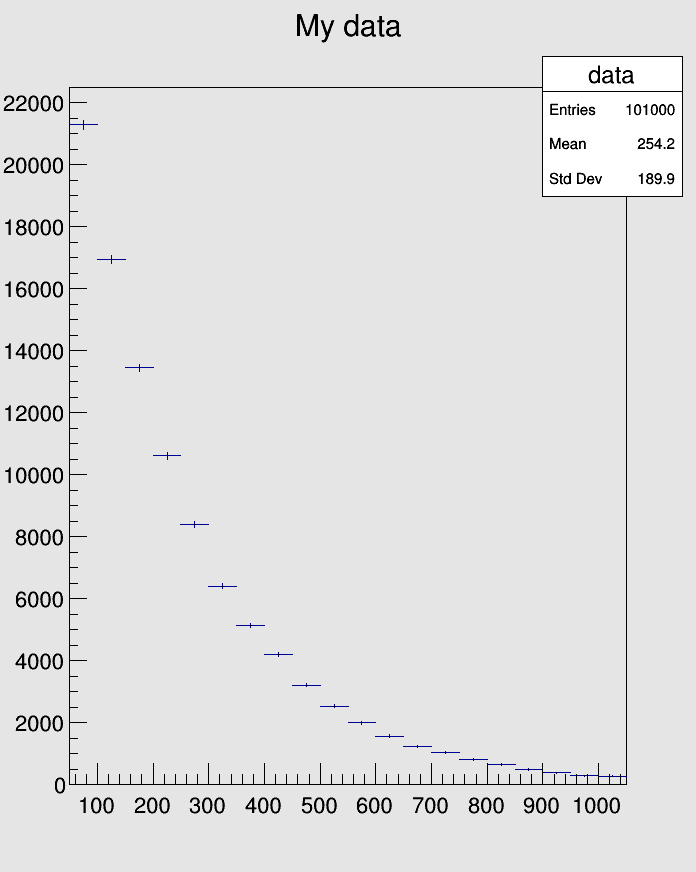

In [17]:
DataHisto.Draw("E")
c1.Update()
gROOT.GetListOfCanvases().Draw()

In [24]:
for j in range(DataHisto.GetNbinsX()):
    print(j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [23]:
FullChi2 = [] # Sum (Data-Model)**2/Data
SignalNormalization = [0.001,0.01,0.1,0.5,0.7,1,2,3,4,5,10,100]
for i in SignalNormalization:
  BkgpSigModelTemp = BKG.Clone("bkgpsig"+str(i))
  BkgpSigModelTemp.Sumw2()
  BkgpSigModelTemp.Add(SignalModel,i) #Performs the operation: this = this + c1*f1 if errors are defined (see TH1::Sumw2), errors are also recalculated.
  chi2=0.0
  for j in range(DataHisto.GetNbinsX()+1):
    if DataHisto.GetBinContent(j)!=0: chi2+=((DataHisto.GetBinContent(j)-BkgpSigModelTemp.GetBinContent(j))**2)/DataHisto.GetBinContent(j)
  FullChi2.append(chi2)
print(FullChi2)

[307.7619416249779, 293.4867344002038, 236.72567842593216, 1876.0647462213376, 3853.8629857904793, 8268.221172526046, 35529.14279301557, 82092.20943734523, 147957.421105515, 233124.77779752496, 948493.7366151769, 96341804.97224952]
